### Часть 1. EDA

Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from category_encoders import CountEncoder
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2. Пройдите по основным шагам работы с данными:
выкиньте ненужные признаки: id, name, host_id, host_name, last_review

In [4]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
dataset = dataset.drop(columns=columns_to_drop,  axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


### 2.1
визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots
по результатам анализа произведите предобработку переменных

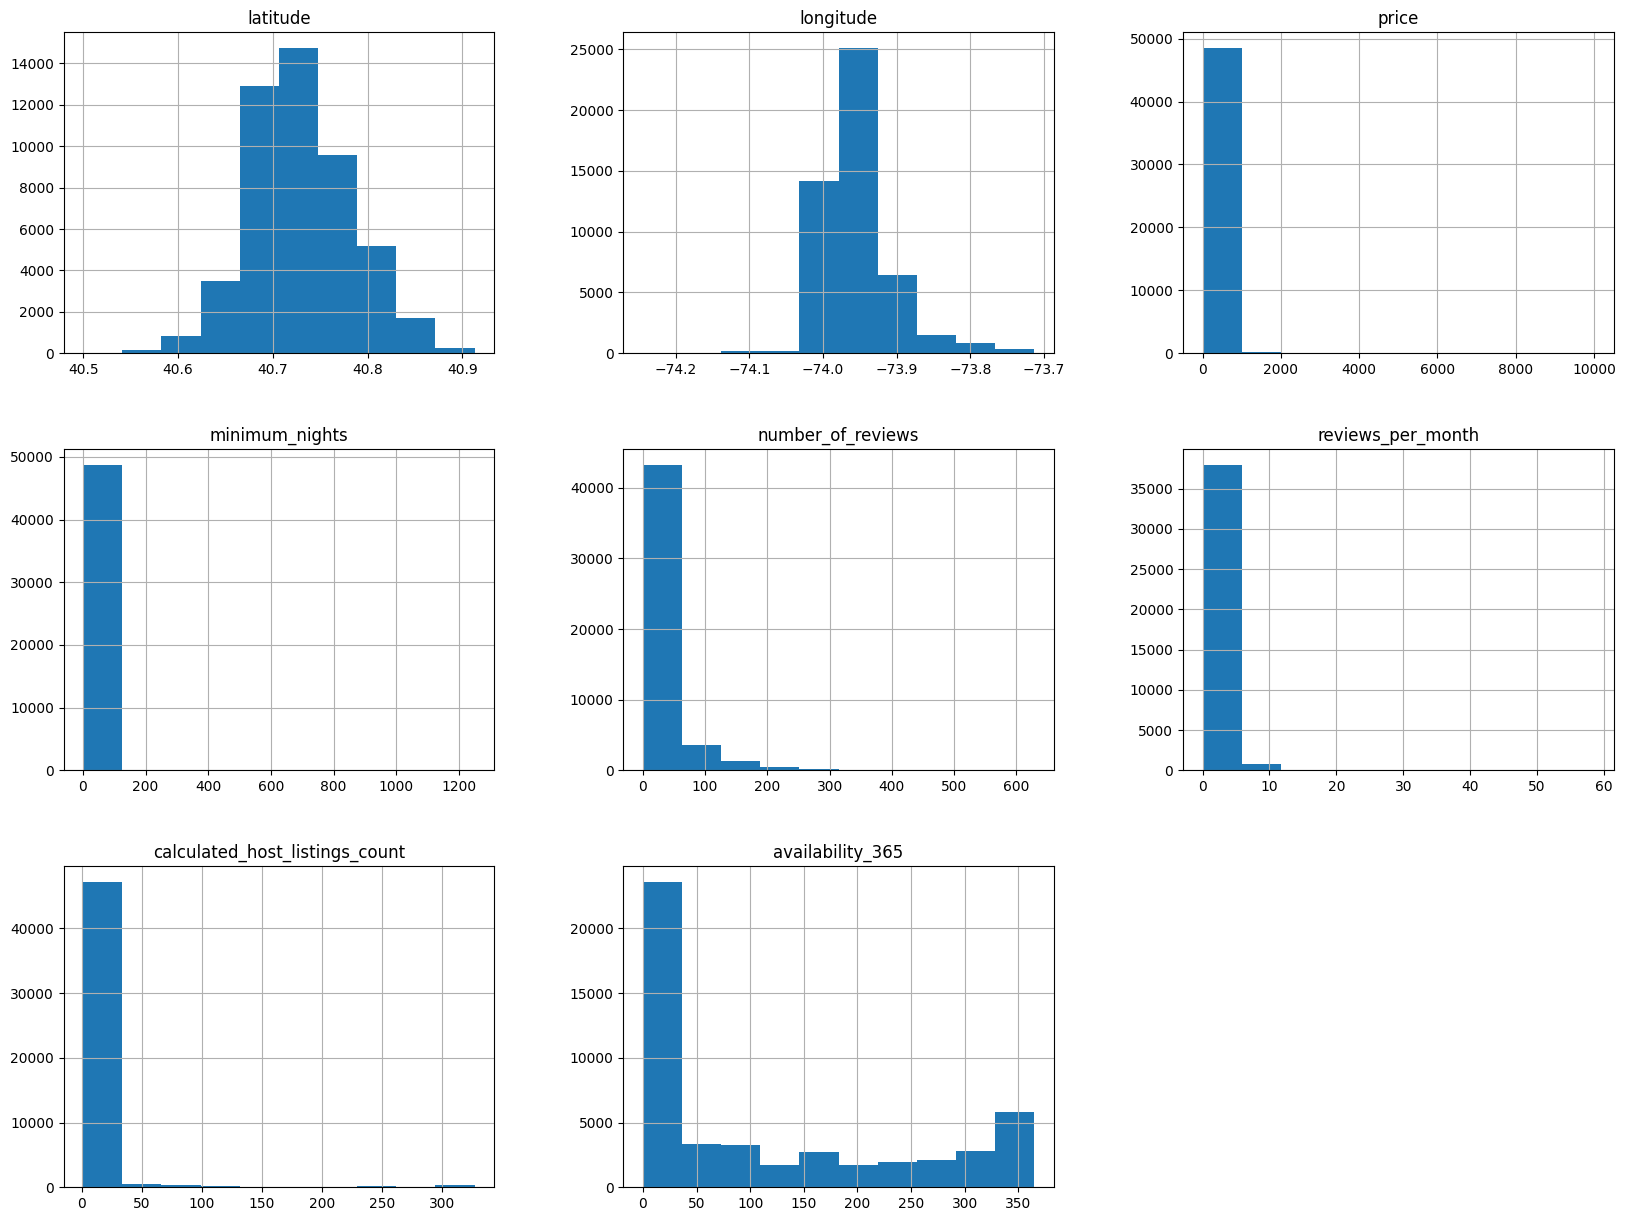

In [6]:
dataset.hist(figsize=(20, 15))
plt.show()

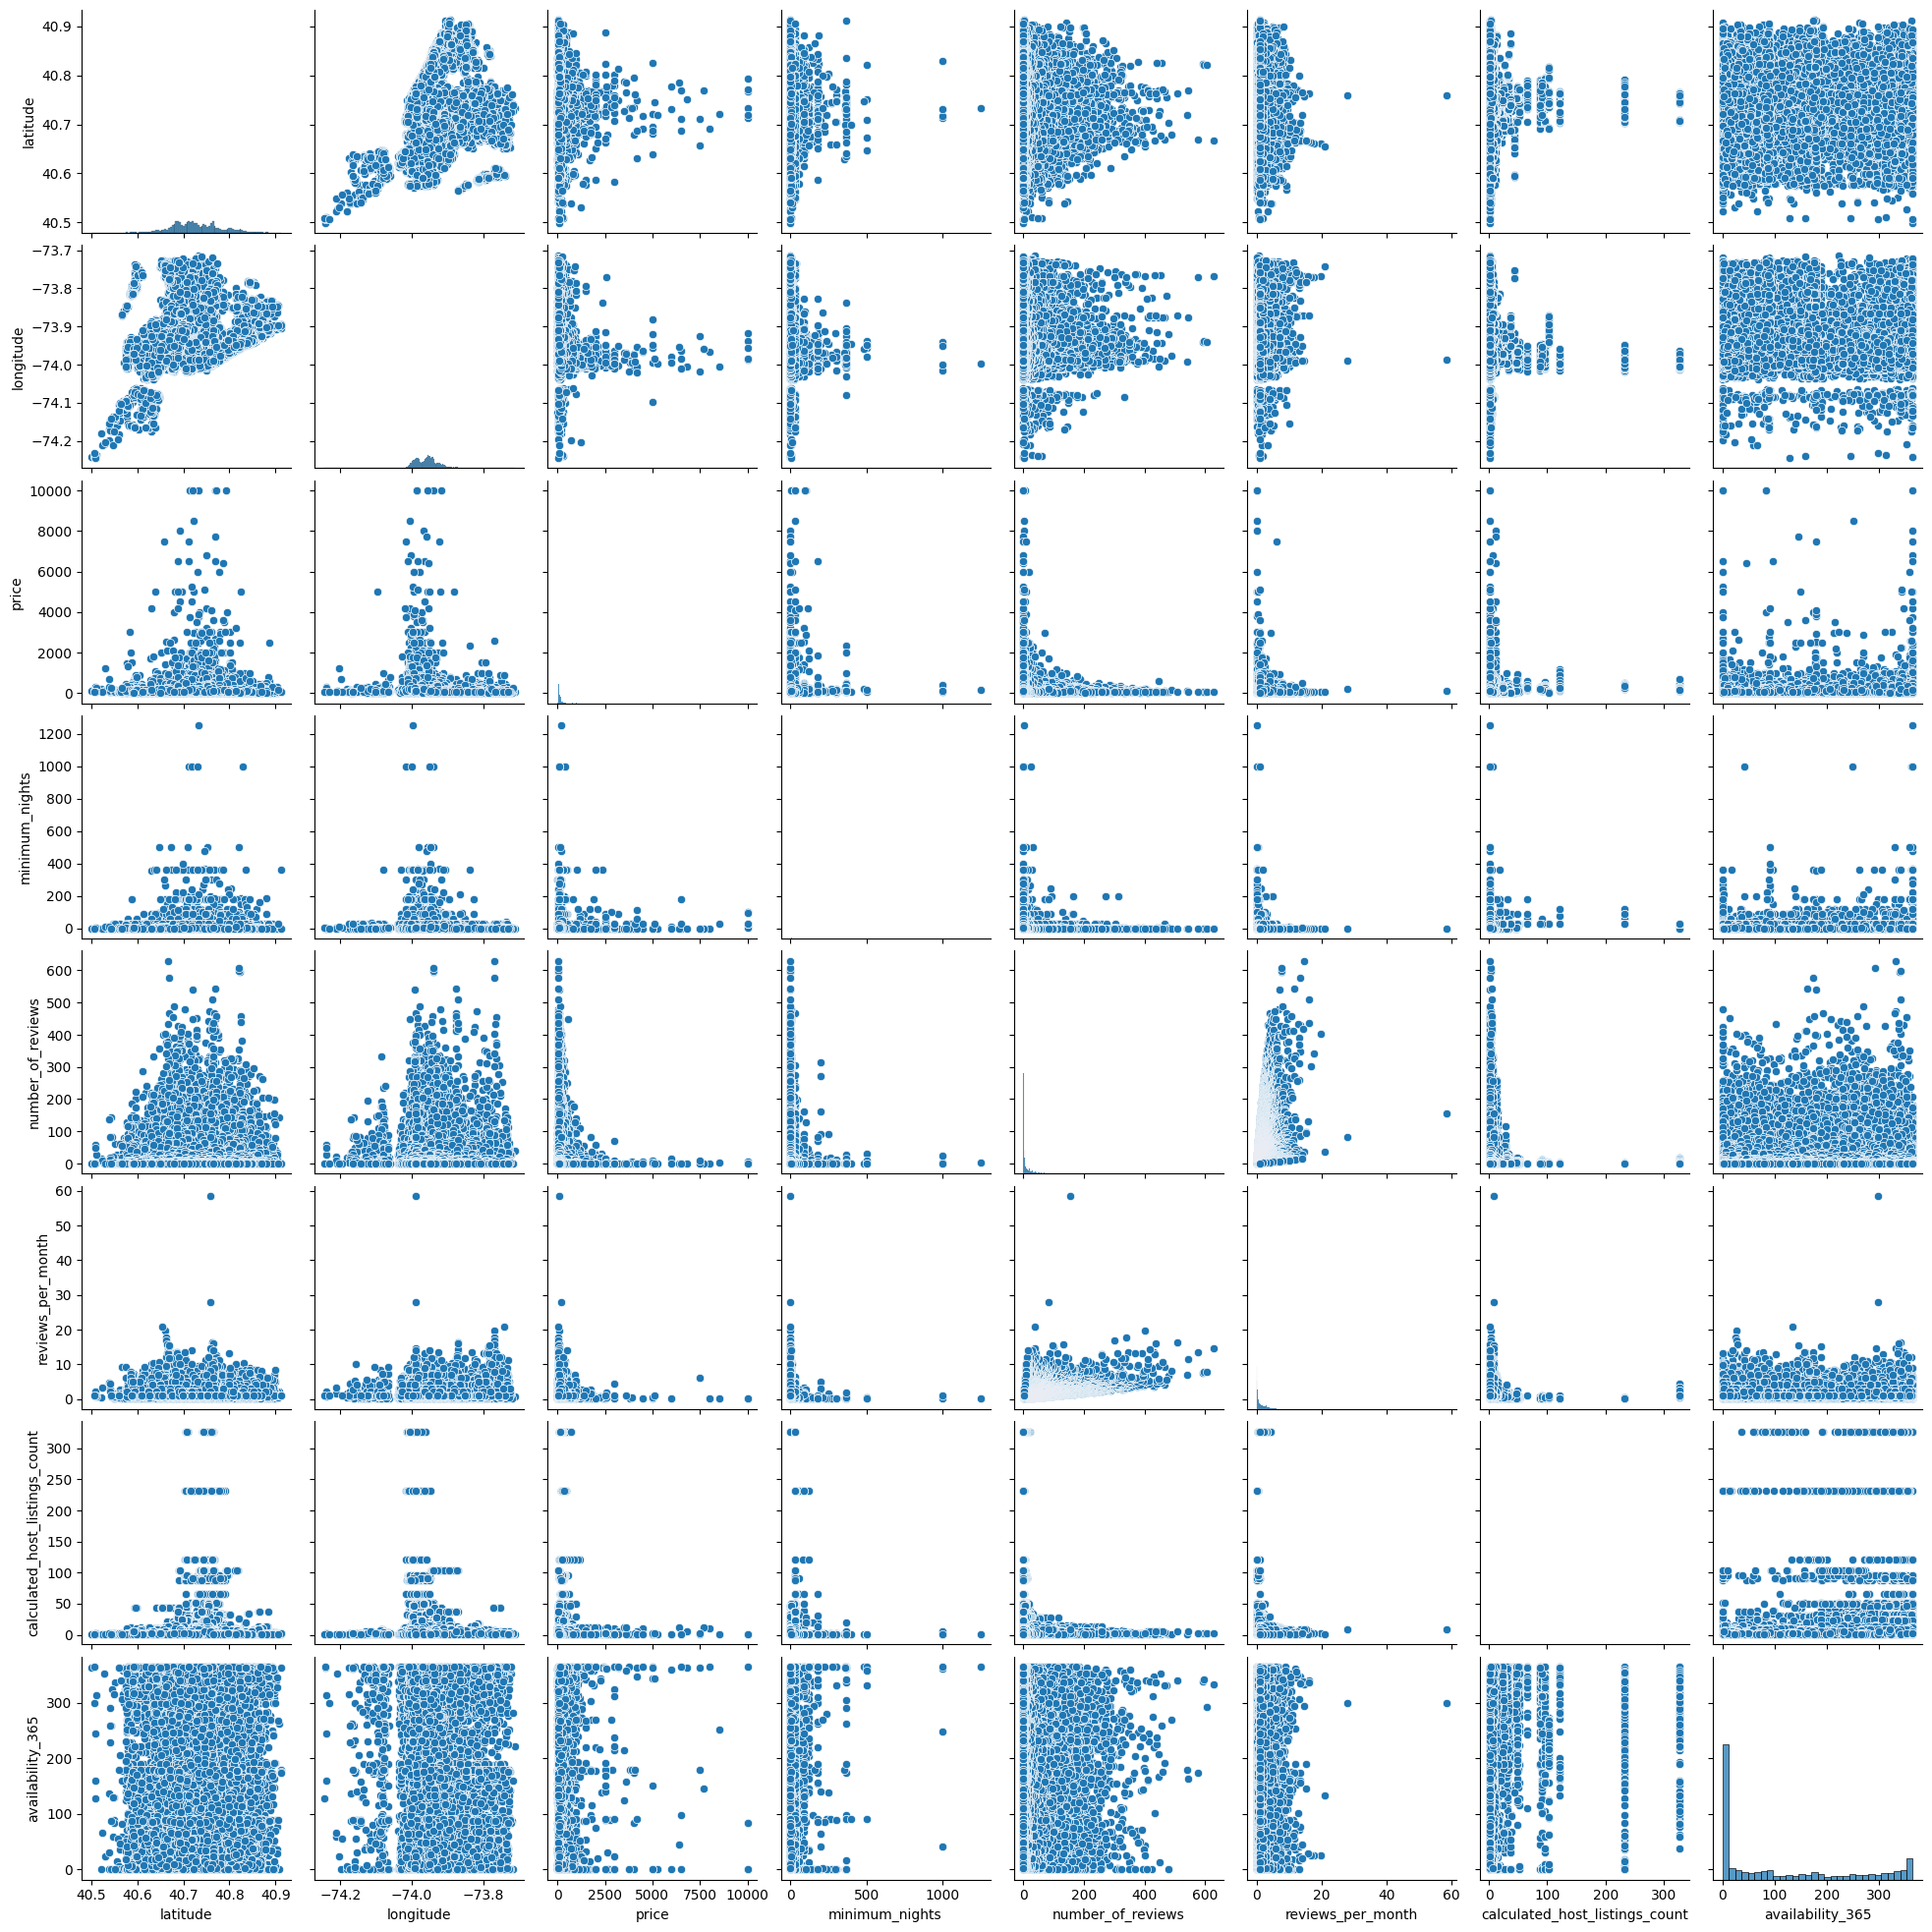

In [7]:
sns.pairplot(dataset)
plt.show()

In [8]:
#проверка таргет столбца
dataset['price'].value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

In [9]:
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Часть 2. 
Preprocessing & Feature Engineering
Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE), сконцентрировавшись на преобразовании признаков.

In [10]:
# функция  кодирования
def encode_func(data, enc, cols=['neighbourhood_group', 'neighbourhood', 'room_type']):
    data_enc = data.copy()
    data_enc[cols] = enc.fit_transform(data_enc[cols])
    return data_enc


# Функция оценки
def evaluate_encoding(data_enc):
    # Регуляризация моделей линейной регрессии
    ridge = RidgeCV()
    lasso = LassoCV()
    elastic = ElasticNetCV()
    # Cтандартизация данных
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_enc.drop('price', axis=1))
    #средняя абсолютная ошибка
    ridge_res = -np.mean(cross_val_score(ridge, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    lasso_res = -np.mean(cross_val_score(lasso, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    elastic_res = -np.mean(cross_val_score(elastic, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    print('MAE results')
    print('ridge', ridge_res)
    print('lasso', lasso_res)
    print('elastic', elastic_res)
    return [ridge_res, lasso_res, elastic_res]
    
# дикт для сохранения результатов
result = {}

In [11]:
# 1 вариант
enc = OrdinalEncoder()
df_enc = encode_func(dataset, enc)

# замена пропусков на -999
df_enc['reviews_per_month'] = df_enc['reviews_per_month'].fillna(-999)
df_enc = df_enc.dropna()
# Запись результата
key = "(OrdinalEncoder with -999)"
result[key] = evaluate_encoding(df_enc)


MAE results
ridge 77.43728210826386
lasso 76.99168826112381
elastic 77.10257450519359


In [12]:
# 2 вариант
enc = OrdinalEncoder()
df_enc = encode_func(dataset, enc)

# замена пропусков на mean
df_enc.loc[:, 'reviews_per_month'] = df_enc.reviews_per_month.fillna(df_enc.reviews_per_month.mean())
df_enc = df_enc.dropna()
# Запись результата
key = "(OrdinalEncoder with mean)"
result[key] = evaluate_encoding(df_enc)

MAE results
ridge 77.50588212396555
lasso 76.89901088661136
elastic 77.16130930116837


In [13]:
# 3 вариант
enc = CountEncoder()
df_enc = encode_func(dataset, enc)
df_enc['neighbourhood_group'] = df_enc['neighbourhood_group']/dataset.shape[0]
df_enc['neighbourhood'] = df_enc['neighbourhood']/dataset.shape[0]
df_enc['room_type'] = df_enc['room_type']/dataset.shape[0]

# замена пропусков на -999
df_enc['reviews_per_month'] = df_enc['reviews_per_month'].fillna(-999)
df_enc = df_enc.dropna()
# Запись результата
key = "(CountEncoder with -999)"
result[key] = evaluate_encoding(df_enc)

MAE results
ridge 83.824604641008
lasso 83.41978472399487
elastic 83.35126789851819


In [14]:
# 4 вариант
enc = CountEncoder()
df_enc = encode_func(dataset, enc)
df_enc['neighbourhood_group'] = df_enc['neighbourhood_group']/dataset.shape[0]
df_enc['neighbourhood'] = df_enc['neighbourhood']/dataset.shape[0]
df_enc['room_type'] = df_enc['room_type']/dataset.shape[0]

# замена пропусков на mean
df_enc.loc[:, 'reviews_per_month'] = df_enc.reviews_per_month.fillna(df_enc.reviews_per_month.mean())
df_enc = df_enc.dropna()
# Запись результата
key = "(CountEncoder with mean)"
result[key] = evaluate_encoding(df_enc)

MAE results
ridge 84.08174962003659
lasso 83.50249721626409
elastic 83.50038740199122


In [15]:
pd.DataFrame(result, index = ['RidgeCV', 'LassoCV', 'ElasticNetCV']).T

,RidgeCV,LassoCV,ElasticNetCV
(OrdinalEncoder with -999),77.437282,76.991688,77.102575
(OrdinalEncoder with mean),77.505882,76.899011,77.161309
(CountEncoder with -999),83.824605,83.419785,83.351268
(CountEncoder with mean),84.081750,83.502497,83.500387


### Лучший вариант (CountEncoder with mean)

In [16]:
# Cтандартизация данных
scaler = StandardScaler()

#разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_enc.drop(['price'], axis=1), df_enc['price'], test_size=0.3, random_state=42)
#обучение модели и применение
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

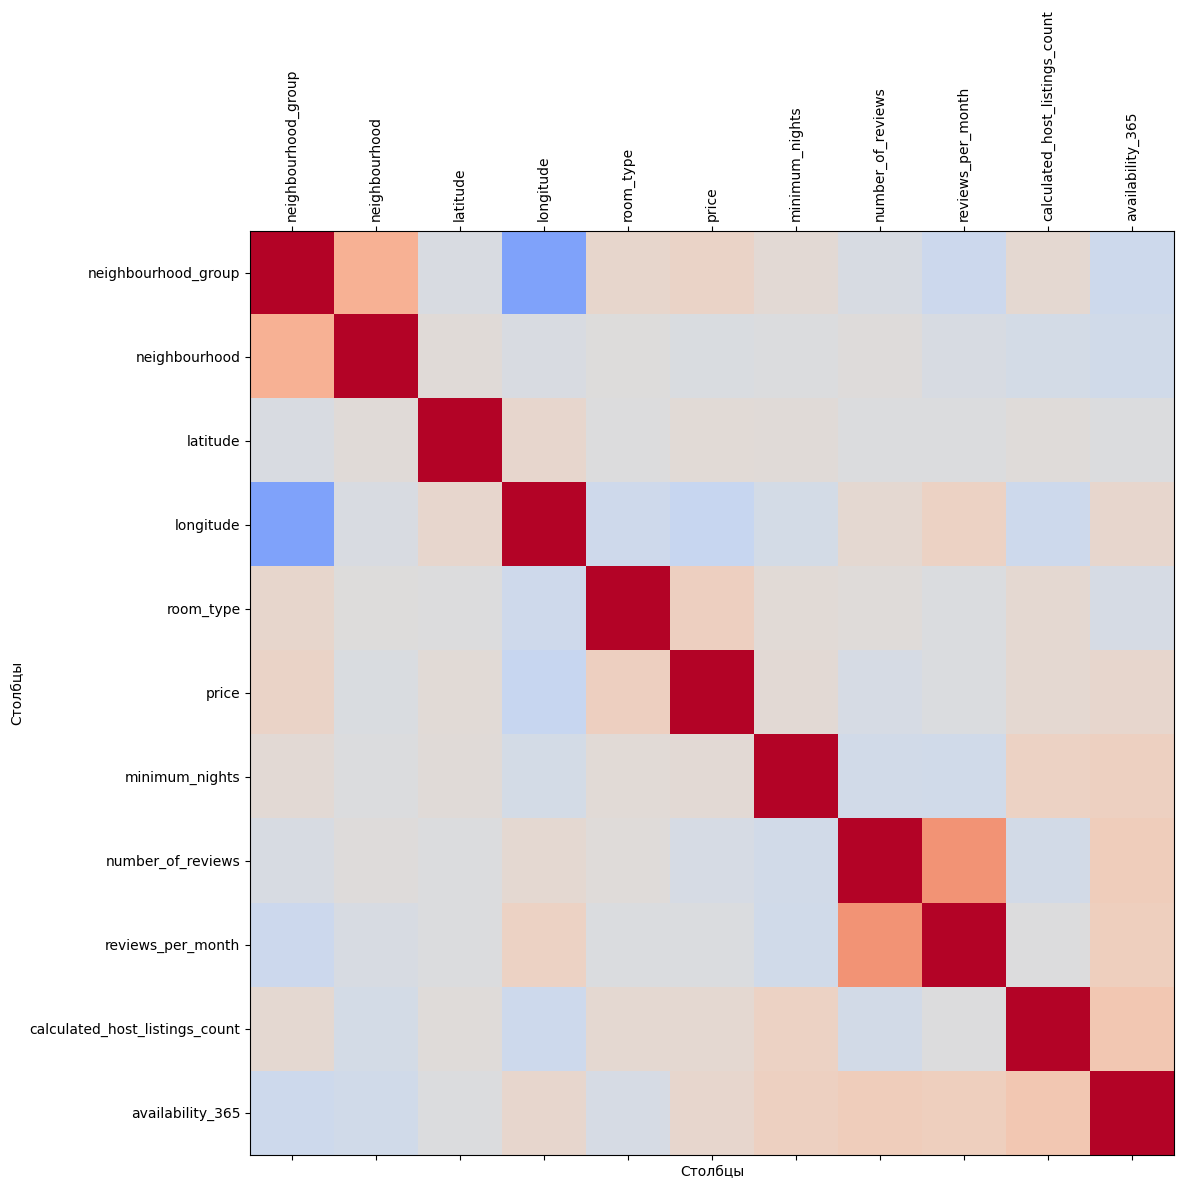

In [17]:
# Пример построения матрицы попарных корреляций на основе лучшей выборки
corr_matrix = df_enc.corr()

# Визуализация матрицы корреляций
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Добавление названий столбцов
tick_marks = np.arange(len(corr_matrix.columns))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Подпись осей
ax.set_xlabel('Столбцы')
ax.set_ylabel('Столбцы');

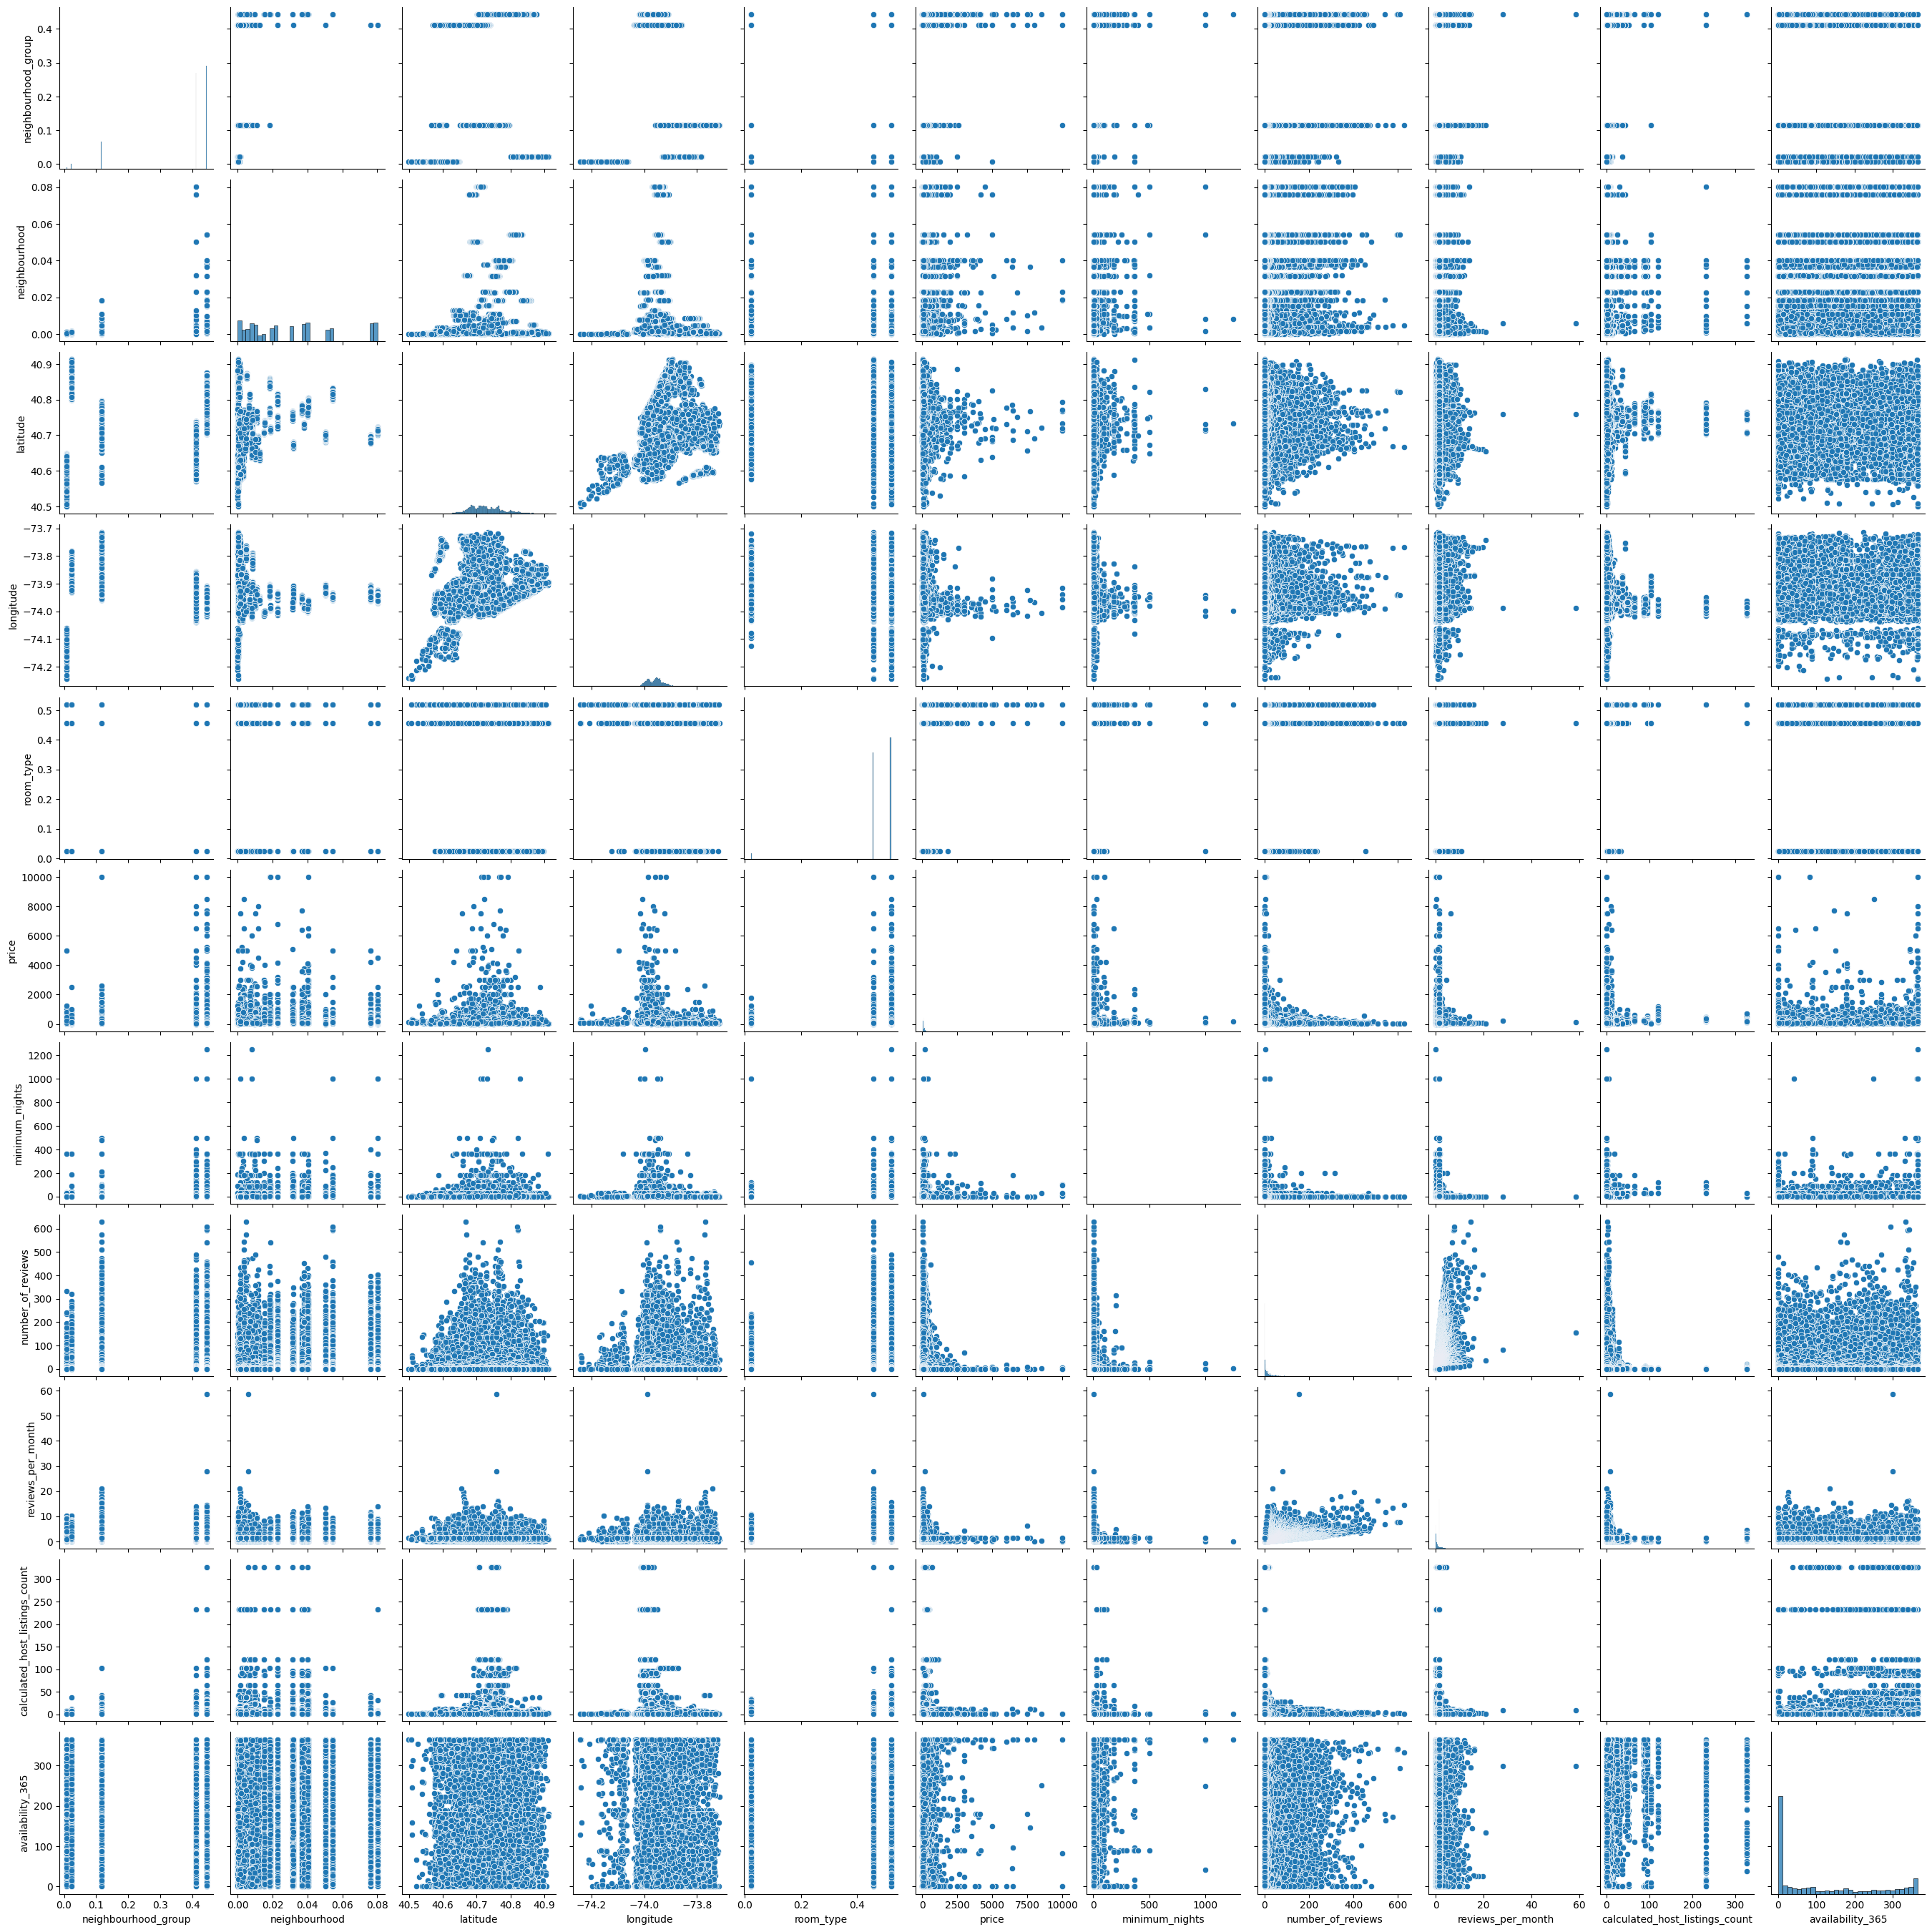

In [18]:
#корреляции между всеми возможными парами переменных
sns.pairplot(df_enc)
plt.show()

In [19]:
# обучение модели линейной регрессии с регуляризацией методом RidgeCV и оценки её точности на тестовых данных
model = RidgeCV()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.07790153009151779